Import libraries required for the script

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from numpy.polynomial import polynomial as npp
from scipy.stats import linregress

Read the CSV files

In [2]:
filename = 'Dataset_PA_v7'
df = pd.read_csv(filename + '.csv')


Check the columns in the data

In [3]:
df['MID_SPLICE_LAG1'].describe()

count    155464.000000
mean         16.490720
std           1.419298
min         -39.191310
25%          15.701250
50%          16.428310
75%          17.155950
max          24.981030
Name: MID_SPLICE_LAG1, dtype: float64

In [4]:
df.columns

Index(['RECID', 'MACHINEID', 'UPDATETIME', 'GT_BARCODE', 'TIRE_TYPE',
       'COMPONENT_TYPE', 'CUT_LENGTH', 'CONV_TIME', 'SPLICE_LENGTH_LEFT',
       'SPLICE_LENGTH_MID', 'SPLICE_LENGTH_RIGHT', 'PRESSURE_S1_L',
       'PRESSURE_S1_R', 'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L',
       'PRESSURE_S3_R', 'PRESSURE_S4_L', 'PRESSURE_S4_R', 'PRESSURE_S5_L',
       'PRESSURE_S5_R', 'PRESSURE_S6_L', 'PRESSURE_S6_R', 'PRESSURE_S7_L',
       'PRESSURE_S7_R', 'PRESSURE_S8_L', 'PRESSURE_S8_R', 'COMP_PART',
       'COMP_BARCODE', 'COMP_BUILDDATE', 'COMP_MACHINEID', 'COMP_POSITION_BIN',
       'LFT_SPLICE_BIN', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_LAG1',
       'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20',
       'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10',
       'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 'MID_SPLICE_BIN',
       'MID_SPLICE_DELTA', 'MID_SPLICE_LAG1', 'MID_SPLICE_MA5',
       'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50',
       'MID_SPLICE_

Sort the data by timestamp

In [5]:
print(df.shape)
df = df.drop_duplicates(subset=['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R', 'PRESSURE_S2_L',
                                'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R', 'PRESSURE_S4_L',
                                'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R', 'PRESSURE_S6_L', 
                                'PRESSURE_S6_R', 'COMP_POSITION_BIN', 'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1',
                                'RHT_SPLICE_LAG1','SPLICE_OK'])
print(df.shape)

print(df.shape)
df = df.drop_duplicates(subset=['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R', 'PRESSURE_S2_L',
                                'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R', 'PRESSURE_S4_L',
                                'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R', 'PRESSURE_S6_L', 
                                'PRESSURE_S6_R', 'COMP_POSITION_BIN',  'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1',
                                'RHT_SPLICE_LAG1'])
# df = df.drop_duplicates()
print(df.shape)

(155464, 69)
(155450, 69)
(155450, 69)
(155450, 69)


In [6]:
# Duplicate rows grouped by a column, typically ID column
# pd.concat(g for _, g in df.groupby("SPLICE_OK") if len(g) > 1)

# df[ids.isin(ids[ids.duplicated()])].sort("ID")



Check missing data

In [5]:
df['CUT_LENGTH'] = pd.to_numeric(df['CUT_LENGTH'], errors='coerce')
df['CONV_TIME'] = pd.to_numeric(df['CONV_TIME'], errors='coerce')
df['LFT_SPLICE_LAG1'] = pd.to_numeric(df['LFT_SPLICE_LAG1'], errors='coerce')
df['MID_SPLICE_LAG1'] = pd.to_numeric(df['MID_SPLICE_LAG1'], errors='coerce')
df['RHT_SPLICE_LAG1'] = pd.to_numeric(df['RHT_SPLICE_LAG1'], errors='coerce')
df['COMP_POSITION_BIN'] = pd.to_numeric(df['COMP_POSITION_BIN'], errors='coerce')

df['PRESSURE_S1_L'] = pd.to_numeric(df['PRESSURE_S1_L'], errors='coerce')
df['PRESSURE_S2_L'] = pd.to_numeric(df['PRESSURE_S2_L'], errors='coerce')
df['PRESSURE_S3_L'] = pd.to_numeric(df['PRESSURE_S3_L'], errors='coerce')
df['PRESSURE_S4_L'] = pd.to_numeric(df['PRESSURE_S4_L'], errors='coerce')
df['PRESSURE_S5_L'] = pd.to_numeric(df['PRESSURE_S5_L'], errors='coerce')
df['PRESSURE_S6_L'] = pd.to_numeric(df['PRESSURE_S6_L'], errors='coerce')

df['PRESSURE_S1_R'] = pd.to_numeric(df['PRESSURE_S1_R'], errors='coerce')
df['PRESSURE_S2_R'] = pd.to_numeric(df['PRESSURE_S2_R'], errors='coerce')
df['PRESSURE_S3_R'] = pd.to_numeric(df['PRESSURE_S3_R'], errors='coerce')
df['PRESSURE_S4_R'] = pd.to_numeric(df['PRESSURE_S4_R'], errors='coerce')
df['PRESSURE_S5_R'] = pd.to_numeric(df['PRESSURE_S5_R'], errors='coerce')
df['PRESSURE_S6_R'] = pd.to_numeric(df['PRESSURE_S6_R'], errors='coerce')



In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))
df = df.dropna()



                  Total  Percent
SPLICE_OK             0      0.0
PRESSURE_S7_R         0      0.0
PRESSURE_S4_R         0      0.0
PRESSURE_S5_L         0      0.0
PRESSURE_S5_R         0      0.0
PRESSURE_S6_L         0      0.0
PRESSURE_S6_R         0      0.0
PRESSURE_S7_L         0      0.0
PRESSURE_S8_L         0      0.0
LFT_SPLICE_DELTA      0      0.0


In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))


                   Total  Percent
SPLICE_OK              0      0.0
PRESSURE_S7_R          0      0.0
PRESSURE_S4_R          0      0.0
PRESSURE_S5_L          0      0.0
PRESSURE_S5_R          0      0.0
PRESSURE_S6_L          0      0.0
PRESSURE_S6_R          0      0.0
PRESSURE_S7_L          0      0.0
PRESSURE_S8_L          0      0.0
LFT_SPLICE_DELTA       0      0.0
PRESSURE_S8_R          0      0.0
COMP_PART              0      0.0
COMP_BARCODE           0      0.0
COMP_BUILDDATE         0      0.0
COMP_MACHINEID         0      0.0
COMP_POSITION_BIN      0      0.0
PRESSURE_S4_L          0      0.0
PRESSURE_S3_R          0      0.0
PRESSURE_S3_L          0      0.0
PRESSURE_S2_R          0      0.0


In [8]:
df.describe()

,RECID,CUT_LENGTH,CONV_TIME,SPLICE_LENGTH_LEFT,SPLICE_LENGTH_MID,SPLICE_LENGTH_RIGHT,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,...,RHT_SPLICE_MA20,RHT_SPLICE_MA50,RHT_SPLICE_SLOPE5,RHT_SPLICE_SLOPE10,RHT_SPLICE_SLOPE20,RHT_SPLICE_SLOPE50,LFT_SPLICE_OK,MID_SPLICE_OK,RHT_SPLICE_OK,SPLICE_OK
count,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,...,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000,155464.000000
mean,77732.500000,1707.568373,42.199810,7.569065,16.491053,7.283079,0.045994,0.046125,0.262007,0.312539,...,7.283815,7.284067,0.000015,0.000028,0.000011,-0.000008,0.894870,0.913337,0.914964,0.785777
std,44878.735462,4.047936,183.082886,2.365349,1.418919,2.217150,0.100720,0.101074,0.162289,0.155042,...,1.622148,1.538780,0.435582,0.226301,0.118141,0.050523,0.306722,0.281342,0.278936,0.410284
min,1.000000,1089.281000,0.000000,-17.982910,-39.191310,-58.815900,0.000000,0.000000,0.000000,0.000000,...,0.903032,2.537431,-12.394520,-6.352905,-5.543134,-5.543134,0.000000,0.000000,0.000000,0.000000
25%,38866.750000,1706.626000,5.113000,6.063059,15.701250,5.855637,0.010000,0.010000,0.150000,0.250000,...,6.195448,6.248224,-0.248792,-0.134487,-0.067647,-0.029019,1.000000,1.000000,1.000000,1.000000
50%,77732.500000,1707.685000,7.065000,7.411238,16.428310,7.196905,0.010000,0.010000,0.260000,0.300000,...,7.072250,7.037024,0.000317,0.000173,0.000029,-0.000009,1.000000,1.000000,1.000000,1.000000
75%,116598.250000,1708.682000,25.680250,8.962953,17.156240,8.549833,0.010000,0.010000,0.300000,0.330000,...,8.119549,8.038320,0.249167,0.134659,0.067769,0.028998,1.000000,1.000000,1.000000,1.000000
max,155464.000000,1943.112000,10000.010000,24.926180,24.981030,23.163020,0.800000,0.800000,1.000000,1.000000,...,17.529940,15.228170,13.017130,6.498202,3.181778,1.264391,1.000000,1.000000,1.000000,1.000000


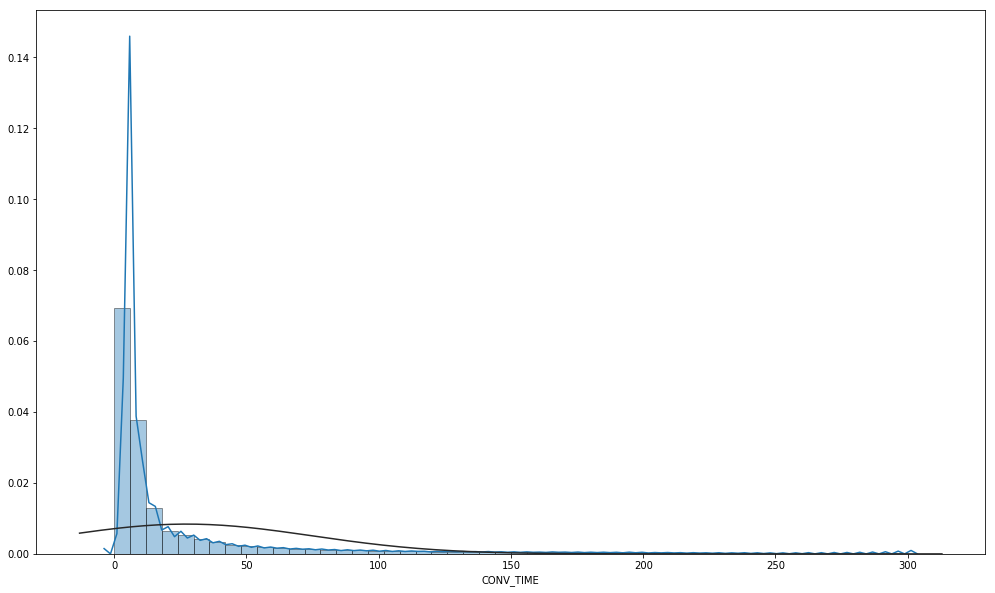

In [16]:
df.sort_values(by = 'CONV_TIME', ascending = False)[:2]
# df_mod = df
df_mod = df.drop(df[df['CONV_TIME'] > 300].index)
# df_mod = df_mod.drop(df_mod[df_mod['CUT_LENGTH'] > 1714].index)
#histogram and normal probability plot
fig = plt.figure(figsize=(17, 10))
sns.distplot(df_mod['CONV_TIME'], fit=norm, hist_kws=dict(edgecolor="k", linewidth=1));
# fig = plt.figure()
# res = stats.probplot(df['CUT_LENGTH'], plot=plt)

In [17]:
my_cols = ['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R',
       'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R',
       'PRESSURE_S4_L', 'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R','PRESSURE_S6_L', 'PRESSURE_S6_R',
       'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1', 'SPLICE_OK']

my_df = df[my_cols]
numeric_cols = my_df.select_dtypes(include=[np.number]).columns
print(numeric_cols)

df_temp1 = my_df[my_df[numeric_cols].apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
df_temp2 = my_df[my_df['SPLICE_OK']==1]
df_temp3 = df_temp2[df_temp2[['LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1']].apply(lambda x: np.abs(x - x.mean()) / x.std() <= 3).all(axis=1)]
print(df_temp1.shape)

Index(['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R',
       'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R',
       'PRESSURE_S4_L', 'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R',
       'PRESSURE_S6_L', 'PRESSURE_S6_R', 'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1',
       'RHT_SPLICE_LAG1', 'SPLICE_OK'],
      dtype='object')
(114323, 18)


In [13]:
my_df[numeric_cols].describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,PRESSURE_S5_L,PRESSURE_S5_R,PRESSURE_S6_L,PRESSURE_S6_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,155450.00000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000,155450.000000
mean,1707.56855,42.198924,0.045966,0.046098,0.262011,0.312540,0.275718,0.320996,0.249009,0.295561,0.041559,0.039491,0.033870,0.038391,7.569144,16.490624,7.283005,0.785790
std,4.04807,183.087492,0.100678,0.101032,0.162294,0.155049,0.175945,0.164759,0.158127,0.151421,0.111303,0.098461,0.037688,0.050834,2.365799,1.419309,2.217357,0.410275
min,1089.28100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.982910,-39.191310,-58.815900,0.000000
25%,1706.62600,5.113000,0.010000,0.010000,0.150000,0.250000,0.150000,0.250000,0.130000,0.250000,0.010000,0.010000,0.020000,0.020000,6.063059,15.701250,5.855637,1.000000
50%,1707.68500,7.065000,0.010000,0.010000,0.260000,0.300000,0.280000,0.300000,0.250000,0.300000,0.010000,0.010000,0.020000,0.020000,7.411238,16.428310,7.196905,1.000000
75%,1708.68200,25.680000,0.010000,0.010000,0.300000,0.330000,0.300000,0.330000,0.300000,0.300000,0.040000,0.030000,0.050000,0.050000,8.962953,17.155950,8.549833,1.000000
max,1943.11200,10000.010000,0.800000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.690000,1.000000,24.926180,24.981030,23.163020,1.000000


In [14]:
# df_low = my_df[my_df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std() >= -2).all(axis=1) & my_df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std() < 0).all(axis=1)]
# df_high = my_df[my_df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std() > 0).all(axis=1) & my_df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std() < 2).all(axis=1)]
df_low1 = my_df[my_df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std() > 0).all(axis=1)]
df_low2 = my_df[my_df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std() < 0).all(axis=1)]



In [15]:
df_low1.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,PRESSURE_S5_L,PRESSURE_S5_R,PRESSURE_S6_L,PRESSURE_S6_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,1709.378080,147.106760,0.245200,0.245200,0.578400,0.591600,0.74760,0.740800,0.650000,0.651200,0.174000,0.185600,0.064000,0.103600,10.377438,17.627959,9.116817,1.0
std,1.171201,154.185108,0.096398,0.096398,0.100278,0.084542,0.18194,0.154216,0.222673,0.230386,0.289943,0.282239,0.020817,0.078945,2.049834,0.609173,1.121044,0.0
min,1707.709000,42.963000,0.100000,0.100000,0.300000,0.470000,0.30000,0.500000,0.300000,0.350000,0.050000,0.040000,0.050000,0.050000,7.617077,16.530660,7.411238,1.0
25%,1708.037000,53.608000,0.200000,0.200000,0.500000,0.500000,0.65000,0.600000,0.500000,0.400000,0.050000,0.050000,0.050000,0.050000,8.964824,17.152490,8.341403,1.0
50%,1709.517000,65.626000,0.250000,0.250000,0.600000,0.600000,0.81000,0.750000,0.500000,0.700000,0.050000,0.080000,0.050000,0.050000,9.793941,17.568490,8.859025,1.0
75%,1710.392000,138.941000,0.300000,0.300000,0.600000,0.600000,0.90000,0.900000,0.900000,0.900000,0.080000,0.160000,0.080000,0.150000,11.760650,18.091590,9.793365,1.0
max,1711.348000,571.001000,0.600000,0.600000,0.790000,0.800000,0.90000,0.900000,1.000000,1.000000,1.000000,1.000000,0.120000,0.260000,15.597330,18.810010,12.278120,1.0


In [16]:
# df_high.describe()

NameError: name 'df_high' is not defined

In [ ]:
my_df.describe()

In [ ]:
df_temp1.describe()

In [ ]:
df_temp2.describe()

In [ ]:
df_temp3.describe()

In [ ]:
#df.head
df.to_csv(filename + '_mod01.csv', header=True, index=False, float_format='%.5f')


In [ ]:
df_low = my_df[my_df[numeric_cols].apply(lambda x: ((x - x.mean()) / x.std() < 0)).all(axis=1)]

In [ ]:
df_low.describe()
